In [1]:
print('Ritu')

Ritu


In [2]:
# Problem Reg/Class
# Data collect
# Modeles call
# Data EDA :- null,fill,dtype, conv
# Data preprocessing:- feature engineearing/feature scaling
# features & target brake
# split
# linear reg, lasso,ridge,ols,df,rf,svm,knn
# hyper,grid,cv,pca
# matrices:- MSE,MAS,RMSE,R2_score,score
# best model
# value predict
# html,css,js
# backend:- flask,fastapi,django
# mysql

# Import Modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
# import pymysql as py
import warnings
from datetime import datetime
# ----------------------------
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
# from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# -------------------------------------
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
import joblib

warnings.filterwarnings('ignore')
print('All modules imported successfully!!')


All modules imported successfully!!


# Data Load

In [4]:
df = pd.read_csv('Taxi_data.csv')

# Head

In [5]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-23 15:12:00.000000132,4.1,2010-04-23 15:12:00 UTC,-73.973925,40.748950,-73.966458,40.753695,1
1,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
2,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
3,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
4,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1


# Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9999 non-null   object 
 1   fare_amount        9999 non-null   float64
 2   pickup_datetime    9999 non-null   object 
 3   pickup_longitude   9999 non-null   float64
 4   pickup_latitude    9999 non-null   float64
 5   dropoff_longitude  9999 non-null   float64
 6   dropoff_latitude   9999 non-null   float64
 7   passenger_count    9999 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 625.1+ KB


In [7]:
df = df[df['pickup_latitude'] <=90]
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-23 15:12:00.000000132,4.1,2010-04-23 15:12:00 UTC,-73.973925,40.748950,-73.966458,40.753695,1
1,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
2,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
3,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
4,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
...,...,...,...,...,...,...,...,...
9994,2010-02-15 15:52:46.0000006,6.5,2010-02-15 15:52:46 UTC,-74.004429,40.721271,-74.006460,40.739435,3
9995,2010-08-27 08:45:01.0000004,4.1,2010-08-27 08:45:01 UTC,-73.983616,40.756005,-73.976169,40.763282,1
9996,2011-10-26 10:44:00.00000086,11.7,2011-10-26 10:44:00 UTC,-73.988277,40.748970,-73.963712,40.773958,2
9997,2011-12-16 15:37:00.000000179,5.7,2011-12-16 15:37:00 UTC,-74.002112,40.748727,-73.992467,40.756252,1


# Geo distance calculate

In [8]:
from geopy.distance import geodesic

In [9]:
delhi = (28.6139,77.2090)
haldwani = (29.2197,79.5286)
round(geodesic(haldwani,delhi).km,2)

235.95

In [10]:
def distance(pickup_lat,pickup_lon,dropoff_lat,dropoff_lon):
    return round(geodesic((pickup_lat,pickup_lon),(dropoff_lat,dropoff_lon)).miles,2)

In [11]:
distance(28.6139,77.2090,29.2197,79.5286)

146.61

In [12]:
df.apply(lambda row:
         (row['pickup_latitude'],row['pickup_longitude'],
         row['dropoff_latitude'],row['dropoff_longitude']),axis = 1)

0        (40.74895, -73.973925, 40.753695, -73.966458)
1        (40.721319, -73.844311, 40.712278, -73.84161)
2       (40.711303, -74.016048, 40.782004, -73.979268)
3        (40.76127, -73.982738, 40.750562, -73.991242)
4        (40.733143, -73.98713, 40.758092, -73.991567)
                             ...                      
9994     (40.721271, -74.004429, 40.739435, -74.00646)
9995    (40.756005, -73.983616, 40.763282, -73.976169)
9996     (40.74897, -73.988277, 40.773958, -73.963712)
9997    (40.748727, -74.002112, 40.756252, -73.992467)
9998      (40.729071, -73.992093, 40.76305, -73.97447)
Length: 9998, dtype: object

# Create New column Distance

In [13]:
df['distance'] = df.apply(lambda raw:distance(raw['pickup_latitude'],raw['pickup_longitude'],raw['dropoff_latitude'],raw['dropoff_longitude']),axis = 1)

In [14]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2010-04-23 15:12:00.000000132,4.1,2010-04-23 15:12:00 UTC,-73.973925,40.748950,-73.966458,40.753695,1,0.51
1,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.64
2,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,5.25
3,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.86
4,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,1.74
...,...,...,...,...,...,...,...,...,...
9994,2010-02-15 15:52:46.0000006,6.5,2010-02-15 15:52:46 UTC,-74.004429,40.721271,-74.006460,40.739435,3,1.26
9995,2010-08-27 08:45:01.0000004,4.1,2010-08-27 08:45:01 UTC,-73.983616,40.756005,-73.976169,40.763282,1,0.64
9996,2011-10-26 10:44:00.00000086,11.7,2011-10-26 10:44:00 UTC,-73.988277,40.748970,-73.963712,40.773958,2,2.15
9997,2011-12-16 15:37:00.000000179,5.7,2011-12-16 15:37:00 UTC,-74.002112,40.748727,-73.992467,40.756252,1,0.73


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9998 non-null   object 
 1   fare_amount        9998 non-null   float64
 2   pickup_datetime    9998 non-null   object 
 3   pickup_longitude   9998 non-null   float64
 4   pickup_latitude    9998 non-null   float64
 5   dropoff_longitude  9998 non-null   float64
 6   dropoff_latitude   9998 non-null   float64
 7   passenger_count    9998 non-null   int64  
 8   distance           9998 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 781.1+ KB


# Convert object to datetime

In [16]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9998 non-null   object             
 1   fare_amount        9998 non-null   float64            
 2   pickup_datetime    9998 non-null   datetime64[ns, UTC]
 3   pickup_longitude   9998 non-null   float64            
 4   pickup_latitude    9998 non-null   float64            
 5   dropoff_longitude  9998 non-null   float64            
 6   dropoff_latitude   9998 non-null   float64            
 7   passenger_count    9998 non-null   int64              
 8   distance           9998 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1), object(1)
memory usage: 781.1+ KB


# # Extract date and time features

In [18]:
df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['day'] = df.pickup_datetime.dt.day
df['hour'] = df.pickup_datetime.dt.hour
df['minute'] = df.pickup_datetime.dt.minute
df['second'] = df.pickup_datetime.dt.second

In [19]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,day,hour,minute,second
0,2010-04-23 15:12:00.000000132,4.1,2010-04-23 15:12:00+00:00,-73.973925,40.748950,-73.966458,40.753695,1,0.51,2010,4,23,15,12,0
1,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.64,2009,6,15,17,26,21
2,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5.25,2010,1,5,16,52,16
3,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.86,2011,8,18,0,35,0
4,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,1.74,2012,4,21,4,30,42


# drop pickup_datetime & key

In [20]:
df.drop(['pickup_datetime','key'],axis = 1,inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        9998 non-null   float64
 1   pickup_longitude   9998 non-null   float64
 2   pickup_latitude    9998 non-null   float64
 3   dropoff_longitude  9998 non-null   float64
 4   dropoff_latitude   9998 non-null   float64
 5   passenger_count    9998 non-null   int64  
 6   distance           9998 non-null   float64
 7   year               9998 non-null   int32  
 8   month              9998 non-null   int32  
 9   day                9998 non-null   int32  
 10  hour               9998 non-null   int32  
 11  minute             9998 non-null   int32  
 12  second             9998 non-null   int32  
dtypes: float64(6), int32(6), int64(1)
memory usage: 859.2 KB


In [22]:
df.shape

(9998, 13)

# Null values check

In [23]:
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
distance             0
year                 0
month                0
day                  0
hour                 0
minute               0
second               0
dtype: int64

# Univariate analysis of fare amount

<Axes: ylabel='Frequency'>

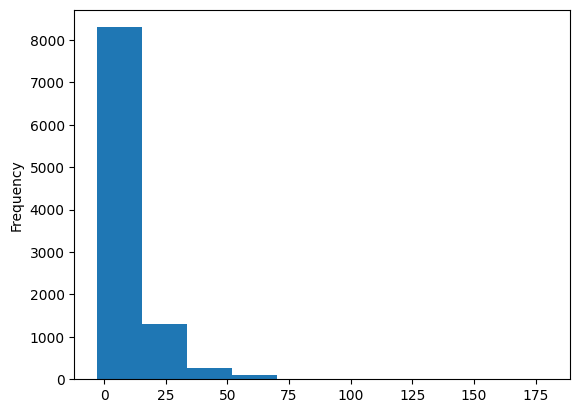

In [24]:
df.fare_amount.plot(kind = 'hist')

<Axes: xlabel='fare_amount', ylabel='Count'>

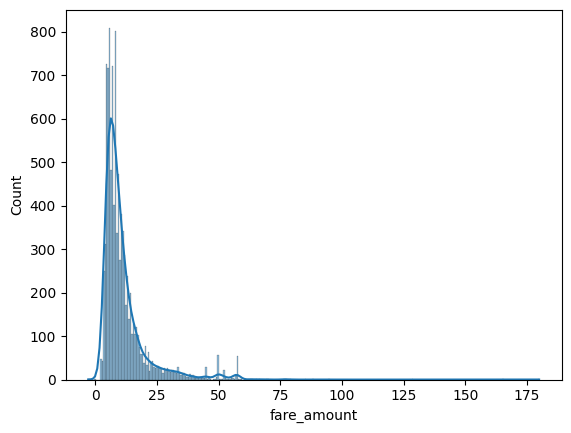

In [25]:
sns.histplot(df.fare_amount,kde = True)

# Maximum fare lies between $2 to $20
# Fare_amount has more outliers

# Checking Outliers

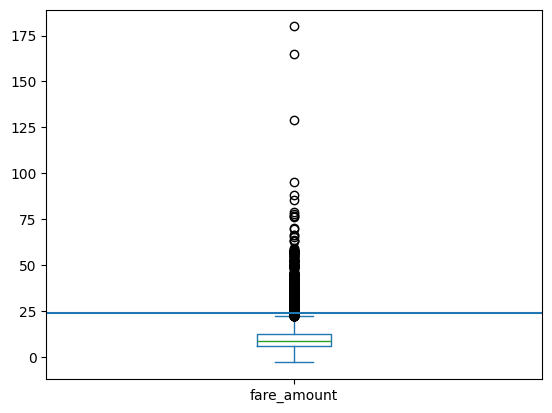

In [26]:
df.fare_amount.plot(kind = 'box')
plt.axhline(24)

In [27]:
df = df[df.fare_amount<24]

In [28]:
df.shape

(9234, 13)

<Axes: >

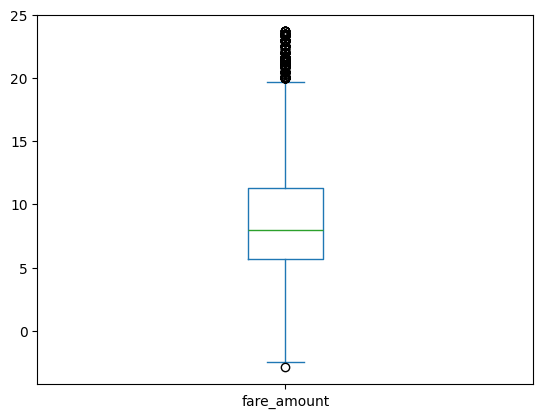

In [29]:
df.fare_amount.plot(kind = 'box')

# No of rides per year

<Axes: xlabel='year', ylabel='count'>

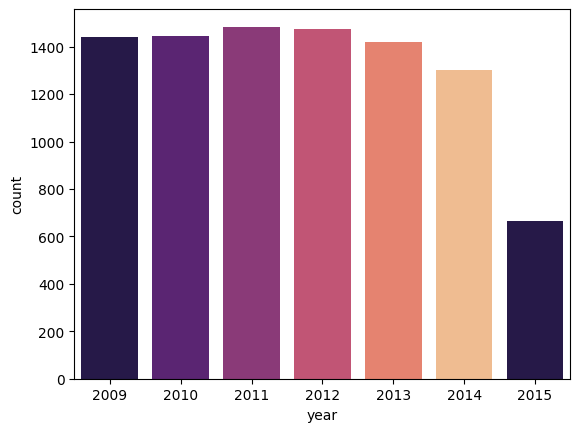

In [30]:
sns.countplot(data = df,x='year',palette =sns.color_palette('magma') )

## Rides for 2015

<Axes: xlabel='month', ylabel='count'>

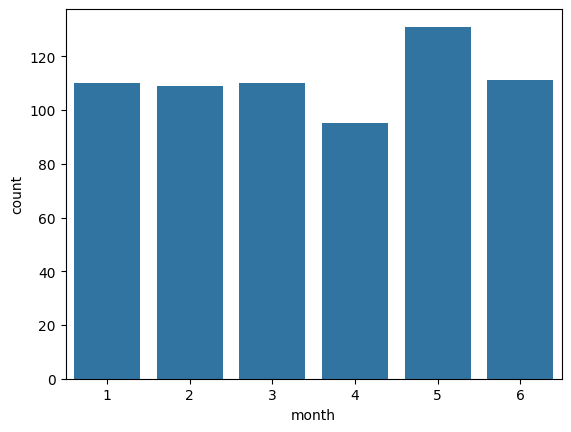

In [31]:
sns.countplot(data = df[df.year == 2015],x='month')

# Rides per day

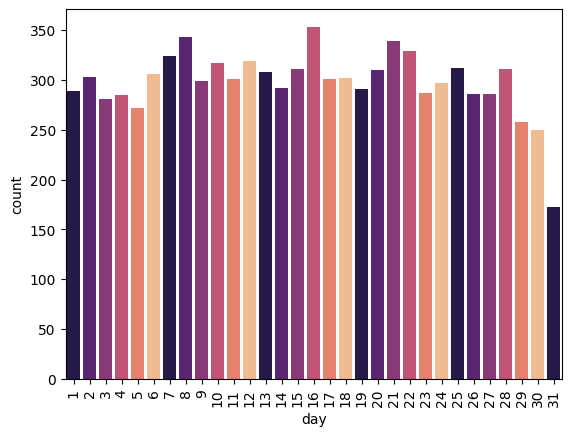

In [32]:
sns.countplot(data = df,x = 'day',palette = sns.color_palette('magma'))
plt.xticks(rotation = 90)
plt.show()


# Per day maximum rides are more than 280
# Ride drop in last day every month
# user take atleast more than 200 ride daily
# maximum rides on 8th and 16th of every month
# Rides decrease gradually in last three days of month

# distance vs fare_amount

<Axes: xlabel='distance', ylabel='fare_amount'>

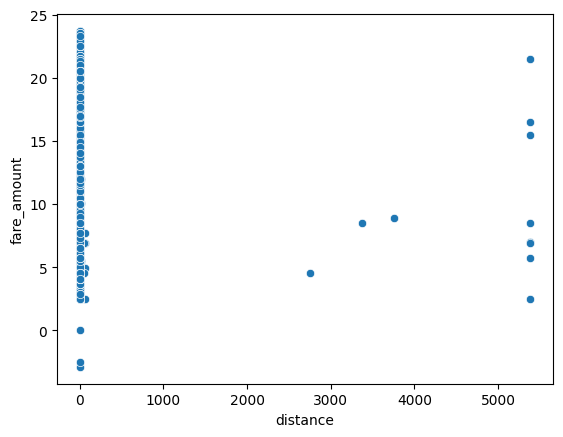

In [33]:
sns.scatterplot(data = df, x = 'distance', y = 'fare_amount')

# no such relation b/w fare amount and distance

# Passenger_count vs fare_amount

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

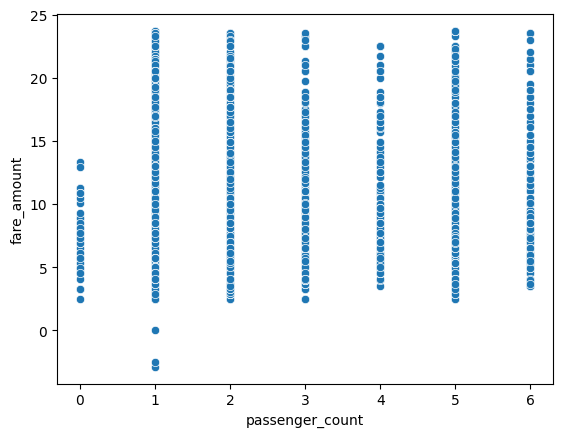

In [34]:
sns.scatterplot(data = df, x = 'passenger_count', y = 'fare_amount')

# no such relation b/w passenger_count and fare_amount

<Axes: xlabel='distance', ylabel='fare_amount'>

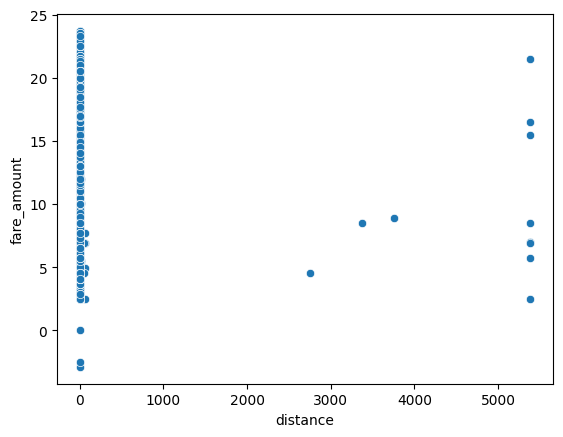

In [35]:
sns.scatterplot(data = df,x='distance',y = 'fare_amount')

In [36]:
df.to_csv('final_data.csv',index = False)

In [37]:
df = pd.read_csv('final_data.csv')

# Trani Test split

In [38]:
X = df.drop('fare_amount',axis = 1)
y = df.fare_amount

In [39]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.2,random_state = 42)

In [41]:
# model = BaggingRegressor(estimator = LinearRegression(),n_estimators = 2)
# model.fit(X_train,y_train)
# print(model.score(X_test,y_test))
# cross_val_score(model,X_scale,y,cv = 5).mean()

In [42]:
# model = AdaBoostRegressor(estimator = LinearRegression(),n_estimators = 2)
# model.fit(X_train,y_train)
# print(model.score(X_test,y_test))
# cross_val_score(model,X_scale,y,cv = 5).mean()

In [43]:
# model = GradientBoostingRegressor(n_estimators = 10,learning_rate = 1)
# model.fit(X_train,y_train)
# print(model.score(X_test,y_test))
# cross_val_score(model,X_scale,y,cv = 5).mean()

In [44]:
# model = XGBRegressor(n_estimators = 50,learning_rate = 1)
# model.fit(X_train,y_train)
# print(model.score(X_test,y_test))
# cross_val_score(model,X_scale,y,cv = 5).mean()

In [45]:
# lr_model = LinearRegression()
# lr_model.fit(X_train,y_train)
# lr_model.score(X_test,y_test)

In [46]:
# rf_model = RandomForestRegressor()
# rf_model.fit(X_train,y_train)
# rf_model.score(X_test,y_test)

# All Model Analysis

In [47]:
# models = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),Lasso(),Ridge(),SVR(),KNeighborsRegressor()]

In [48]:
# models

In [49]:
# def all_models_score(model,X,y):
#     X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
#     model.fit(X_train,y_train)
#     score = model.score(X_test,y_test)
#     cvs = cross_val_score(model,X,y,cv = 5).mean()
#     y_pred = model.predict(X_test)

#     mse = mean_squared_error(y_test,y_pred)
#     rmse = mse**0.5
#     mae = mean_absolute_error(y_test,y_pred)
#     r2score = r2_score(y_test,y_pred)


#     bagging_model = BaggingRegressor(estimator = model,n_estimators =50 )
#     bagging_model.fit(X_train,y_train)
#     bagging_score = bagging_model.score(X_test,y_test)
#     bagging_CVScore = cross_val_score(bagging_model,X,y,cv = 5).mean()

#     boost_model = AdaBoostRegressor(estimator = model,n_estimators = 50)
#     boost_model.fit(X_train,y_train)
#     boost_score = boost_model.score(X_test,y_test)
#     boost_CVScore = cross_val_score(boost_model,X,y,cv = 50).mean()
#     print(str(model))

#     return (score,r2score,cvs,bagging_score,bagging_CVScore,boost_score,boost_CVScore,mse,mae,rmse)

In [50]:
# all_models_score_data = {'Model':[],'Score':[],'R2_Score':[],'CVS':[],'Bagging_score':[],'Bagging_CVScore':[],'Boost_score':[],'Boost_CVScore':[],'MSE':[],'MAE':[],'RMSE':[],}

# for i in models:
#     score,r2score,cvs,bagging_score,bagging_CVScore,boost_score,boost_CVScore,mse,mae,rmse = all_models_score(i,X_scale,y)
#     all_models_score_data['Model'].append(str(i)
#     all_models_score_data['Score'].append(score)
#     all_models_score_data['R2_Score'].append(r2score)
#     all_models_score_data['CVS'].append(cvs)
#     all_models_score_data['Bagging_score'].append(bagging_score)
#     all_models_score_data['Bagging_CVScore'].append(bagging_CVScore)
#     all_models_score_data['Boost_score'].append(boost_score)
#     all_models_score_data['Boost_CVScore'].append(boost_CVScore)
#     all_models_score_data['MSE'].append(mse)
#     all_models_score_data['MAE'].append(mae)
#     all_models_score_data['RMSE'].append(rmse)
# all_models_score_data_df = pd.DataFrame(all_models_score_data)
# all_models_score_data_df.to_csv('all_models_score_data.csv',index = False)
# all_models_score_data_df

# All gradient Model Analysis

In [51]:
# def gradient_model_score(gradient,n_estimator,learning_rate,X,y):
#     X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
#     model = gradient(n_estimators = n_estimator,learning_rate = learning_rate)
#     model.fit(X_train,y_train)
#     score = model.score(X_test,y_test)
#     cvs = cross_val_score(model,X,y,cv = 5).mean()
#     y_pred = model.predict(X_test)

#     mse = mean_squared_error(y_test,y_pred)
#     rmse = mse**0.5
#     mae = mean_absolute_error(y_test,y_pred)
#     r2score = r2_score(y_test,y_pred)
#     display(clear = True)
#     print('gradient',gradient,'n_estimator',n_estimator)
#     return (score,r2score,cvs,mse,mae,rmse)

In [52]:
# gradients = [GradientBoostingRegressor,XGBRegressor]

In [53]:
# gradient_models_score_data = {'Model':[],'N_estimators':[],'Learning_rate':[],'Score':[],'R2_Score':[],'CVS':[],'MSE':[],'MAE':[],'RMSE':[]}

# for gradient in gradients:
#         for n_estimator in range(1,101):
#             for learning_rate in np.linspace(0.1,1,10).round(1):
#                 score,r2score,cvs,mse,mae,rmse = gradient_model_score(gradient,n_estimator,learning_rate,X_scale,y)
#                 gradient_models_score_data['Model'].append(str(gradient()))
#                 gradient_models_score_data['N_estimators'].append(n_estimator)
#                 gradient_models_score_data['Learning_rate'].append(learning_rate)
#                 gradient_models_score_data['Score'].append(score)
#                 gradient_models_score_data['R2_Score'].append(r2score)
#                 gradient_models_score_data['CVS'].append(cvs)
#                 gradient_models_score_data['MSE'].append(mse)
#                 gradient_models_score_data['MAE'].append(mae)
#                 gradient_models_score_data['RMSE'].append(rmse)

# gradient_models_score_data_df = pd.DataFrame(gradient_models_score_data)
# gradient_models_score_data_df.to_csv('gradient_models_score_data_df.csv',index = False)
# gradient_models_score_data_df

# All Models Score

In [54]:
# all_models_score_data_df = pd.read_csv('all_models_score_data.csv')

In [55]:
# all_models_score_data_df

In [56]:
# all_models_score_data_df.plot(kind='bar',x = 'Model',y = 'R2_Score',color = sns.color_palette('magma'))

# Best Model is Random Forest Based on R2_score

In [57]:
# all_models_score_data_df.plot(kind= 'bar',y = ['MSE','MAE','RMSE'], x = "Model")

# Best Model is Random Forest Based on Sum of squared errors

# All Gradient Model Score

In [58]:
# gradient_models_score_data_df = pd.read_csv('gradient_models_score_data_df.csv')

In [59]:
# gradient_models_score_data_df

# All model Score Analysis

In [60]:
# gradient_models_score_data_df[gradient_models_score_data_df.Score == gradient_models_score_data_df.Score.max()]

# Best Gradient Model is  XGBRegressor with N_estimators = 22 and Learning_rate = 0.2 based on Score

In [61]:
# gradient_models_score_data_df[gradient_models_score_data_df.R2_Score == gradient_models_score_data_df.R2_Score.max()]

# Best Gradient Model is  XGBRegressor with N_estimators = 22 and Learning_rate = 0.2 based on R2_Score

In [62]:
# gradient_models_score_data_df[gradient_models_score_data_df.CVS == gradient_models_score_data_df.CVS.max()]

# Best Gradient Model is  GradientBoostingRegressor with N_estimators = 94 and Learning_rate = 0.1 based on Cross_Val_score

In [63]:
# all_models_score_data_df[all_models_score_data_df.Model == 'RandomForestRegressor()']

# PCA

In [66]:
# pca_model = PCA(.90)
# X_train_pca = pca_model.fit_transform(X_scale)
# X_train_pca

In [67]:
# X_train_pca.shape

In [68]:
# X_train.shape

In [69]:
# final_pca = PCA( 9)
# final_X_pca = final_pca.fit_transform(X_scale)
# X_train,X_test,y_train,y_test = train_test_split(final_X_pca,y,test_size = 0.2,random_state = 42)
# model = GradientBoostingRegressor(n_estimators = 22,learning_rate = 0.1)
# model.fit(X_train,y_train)
# model.score(X_test,y_test)

In [70]:
# final_pca = PCA(.99)
# final_X_pca = final_pca.fit_transform(X_scale)
# X_train,X_test,y_train,y_test = train_test_split(final_X_pca,y,test_size = 0.2,random_state = 42)
# model = GradientBoostingRegressor(n_estimators = 22,learning_rate = 0.1)
# model.fit(X_train,y_train)
# model.score(X_test,y_test)

In [71]:
# PCA conclusion:
# 1>> Pca did not support that much as expected
# 2>> 1 columns explained 58% accuracy
# 3>> 12 columns explained 75% accuracy
# 4>> we will proceed without pca

# GradientBoostingRegressor Model Hyperparameter Tune

In [72]:
# parmas_graid = {
#          'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
#          'criterion' : ['friedman_mse', 'squared_error'],
#          'max_features' : ['sqrt', 'log2'],
#          'max_depth':range(1,5),
#          'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
#         }
# model_graid = GridSearchCV(GradientBoostingRegressor(n_estimators=94,learning_rate=0.1),param_grid = parmas_graid)
# model_graid.fit(X_train,y_train)
# print('ritu done')
# joblib.dump(model_graid,'model_graid.pkl')

In [73]:
# model_graid = joblib.load('model_graid.pkl')
# print(model_graid.best_score_)
# graid_final_model = model_graid.best_estimator_
# graid_final_model.score(X_test,y_test)


# XGBRegressor Model Hyperparameter Tune

In [74]:
# parmas_xgb = {
#          'sampling_method' : ['uniform', 'gradient_based'],
#          'max_depth':range(1,11),
#         'grow_policy':['depthwise','lossguide']
#         }
# model_xgb = GridSearchCV(XGBRegressor(n_estimators=22,learning_rate=0.2),param_grid = parmas_xgb)
# model_xgb.fit(X_train,y_train)
# joblib.dump(model_xgb,'model_xgb.pkl')



In [75]:
# model_xgb = joblib.load('model_xgb.pkl')
# print(model_xgb.best_score_)
# xgb_final_model = model_xgb.best_estimator_
# xgb_final_model.score(X_test,y_test)

# Random Forest Model Hyperparameter Tune

In [76]:
# param_rf = {'n_estimators':range(50,101),
#          'criterion':["squared_error", "absolute_error", "friedman_mse", "poisson"],
#          'max_features':["sqrt", "log2", None]
#         }
# # model = GridSearchCV(RandomForestRegressor(),param_grid=param,return_train_score=False)

In [77]:
# rf_score_dict = {'score':[],'n_estimators':[],'criterion':[],'max_features':[]}

In [78]:
# import threading as th
# counter,fail_counter = 1,1
# def rf_score(X,y,n_est,crt,mf,score_dict):
#     global counter,fail_counter
#     try:
#         X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=150 - n_est)
#         model_rf = RandomForestRegressor(n_estimators = n_est,criterion = crt,max_features = mf)
#         model_rf.fit(X_train,y_train)
#         score = model_rf.score(X_test,y_test)
#         score_dict['score'].append(score)
#         score_dict['n_estimators'].append(n_est)
#         score_dict['criterion'].append(crt)
#         score_dict['max_features'].append(mf)
#         print(counter,'Try Success!!')
#         counter +=1
#     except:
#         print(fail_counter,'Try fails!!')
#         fail_counter +=1



In [79]:
# all_threads = []
# for i in param_rf['n_estimators']:
#     for j in param_rf['criterion']:
#         for k in param_rf['max_features']:
#             thread = th.Thread(target = rf_score,args = [X_scale,y,i,j,k,rf_score_dict])
#             all_threads.append(thread)
# print('Done')

In [80]:
# warnings.filterwarnings('ignore')
# for i in all_threads:
#     i.start()

# for j in all_threads:
#     j.join()

# rf_score_df = pd.DataFrame(rf_score_dict)
# rf_score_df.to_csv('rf_score_df.csv')


In [81]:
# print('ritu')

In [ ]:
# rf_score_dict = {'score':[],'n_estimators':[],'criterion':[],'max_features':[]}
# import threading as th
# counter,fail_counter = 1,1
# def rf_score(X,y,n_est,crt,mf,score_dict):
#     global counter,fail_counter
#     try:
#         X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=150 - n_est)
#         model_rf = RandomForestRegressor(n_estimators = n_est,criterion = crt,max_features = mf)
#         model_rf.fit(X_train,y_train)
#         score = model_rf.score(X_test,y_test)
#         score_dict['score'].append(score)
#         score_dict['n_estimators'].append(n_est)
#         score_dict['criterion'].append(crt)
#         score_dict['max_features'].append(mf)
#         print(counter,'Try Success!!')
#         counter +=1
#     except:
#         print(fail_counter,'Try fails!!')
#         fail_counter +=1

# all_threads = []
# for i in param_rf['n_estimators']:
#     for j in param_rf['criterion']:
#         for k in param_rf['max_features']:
#             thread = th.Thread(target = rf_score,args = [X_scale,y,i,j,k,rf_score_dict])
#             all_threads.append(thread)
# print('Done')
# warnings.filterwarnings('ignore')
# for i in all_threads:
#     i.start()

# for j in all_threads:
#     j.join()

# rf_score_df = pd.DataFrame(rf_score_dict)
# rf_score_df.to_csv('rf_score_df.csv')
# print('Ritu')

In [ ]:
# def all_models_score(model,X,y,score_dict):
#     score_dict['Model'].append(model)
#     X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
#     model.fit(X_train,y_train)
#     score_dict['Score'].append(model.score(X_test,y_test))
#     score_dict['CVS'].append(cross_val_score(model,X,y,cv = 5).mean())
#     y_pred = model.predict(X_test)
#     score_dict['MSE'].append(mean_squared_error(y_test,y_pred))
#     score_dict['RMSE'].append( mse**0.5))
#     score_dict['MAE'].append( mean_absolute_error(y_test,y_pred))
#     score_dict['R2_Score'].append(r2_score(y_test,y_pred))
#     bagging_model = BaggingRegressor(estimator = model,n_estimators =50 )
#     bagging_model.fit(X_train,y_train)
#     score_dict['Bagging_score'].append(bagging_model.score(X_test,y_test))
#     score_dict['Bagging_CVScore'].append(cross_val_score(bagging_model,X,y,cv = 5).mean())
#     boost_model = AdaBoostRegressor(estimator = model,n_estimators = 50)
#     boost_model.fit(X_train,y_train)
#     score_dict['Boost_score'].append(boost_model.score(X_test,y_test))
#     score_dict['Boost_CVScore'].append(cross_val_score(boost_model,X,y,cv = 50).mean())
#     print(str(model))


# models = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),Lasso(),Ridge(),SVR(),KNeighborsRegressor()]
# all_models_score_data = {'Model':[],'Score':[],'R2_Score':[],'CVS':[],'Bagging_score':[],'Bagging_CVScore':[],'Boost_score':[],'Boost_CVScore':[],'MSE':[],'MAE':[],'RMSE':[],}
# all_model_threads = []
# for model in models:
#     thread = th.Thread(target = all_models_score,args = [model,X_scale,y,all_model_threads] )
#     all_model_threads.append(thread)


# warnings.filterwarnings('ignore')
# for i in all_model_threads:
#     i.start()

# for j in all_model_threads:
#     j.join()
    
# all_models_score_data_df = pd.DataFrame(all_models_score_data)
# all_models_score_data_df.to_csv('all_models_score_data.csv',index = False)
# all_models_score_data_df